**DATA PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/kidney-stone-dataset.csv")
df

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
X=df[['gravity'	,'ph'	,'osmo',	'cond'	,'urea'	,'calc']]
y=df[df.columns[-1]]

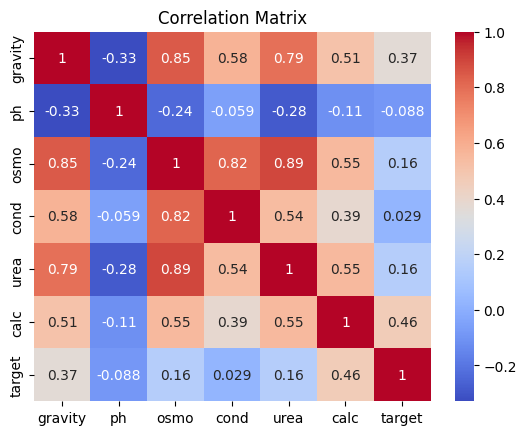

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

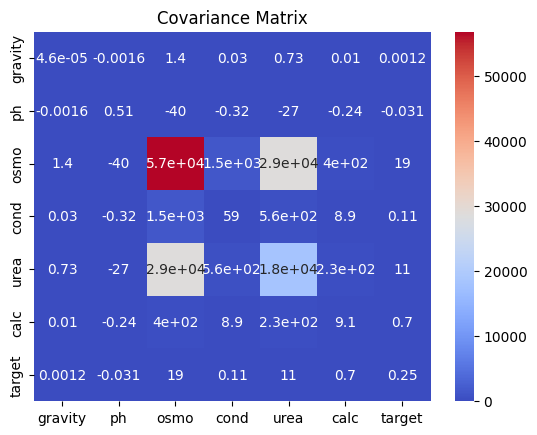

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the covariance matrix
covariance_matrix = df.cov()

# Create a heatmap using seaborn
sns.heatmap(covariance_matrix, cmap='coolwarm', annot=True)

# Set the plot title
plt.title('Covariance Matrix')

# Display the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [ ]:
from sklearn import linear_model
import time
start = time.time()
logr=linear_model.LogisticRegression(max_iter=10000)
logr.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.023131608963012695s


In [ ]:
a=time.time()
logr_pred=logr.predict(X_test)
b=time.time()
print(b-a)

0.003423929214477539


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        45
           1       0.81      0.68      0.74        38

    accuracy                           0.78        83
   macro avg       0.79      0.78      0.78        83
weighted avg       0.79      0.78      0.78        83



In [ ]:
from sklearn.metrics import accuracy_score
la=accuracy_score(y_test,logr_pred)
la

0.7831325301204819

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,logr_pred,squared=False)

0.46569031542379974

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,logr_pred)

0.21686746987951808

In [ ]:
ltr=logr.score(X_train,y_train)
lte=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

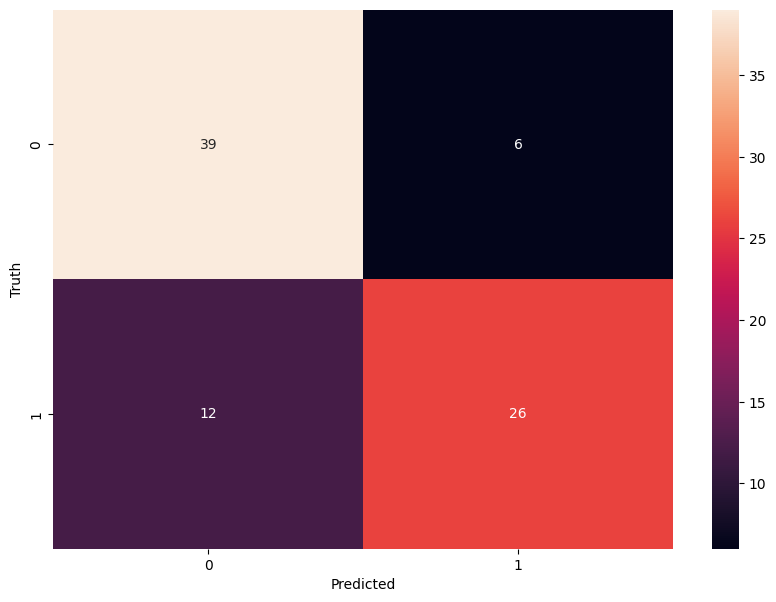

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logr_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Cat Boost**

In [ ]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.9 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
start = time.time()
# Define the CatBoost classifier
model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')

# Train the model
model.fit(X_train, y_train, verbose=False)
stop = time.time()
print(f"Training time: {stop - start}s")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Training time: 0.19202065467834473s
Accuracy: 0.7777777777777778


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18



**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import time
start = time.time()
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Training time: 0.0782465934753418s
Accuracy: 0.7777777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18



**XGBOOST**

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
import time
start = time.time()
# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

stop = time.time()
print(f"Training time: {stop - start}s")
# Make predictions on the test set
y_pred = model.predict(dtest)
y_pred_labels = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

Training time: 0.08719086647033691s
Accuracy: 0.6666666666666666


**LIGHTBGM**

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)

# Set the parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'random_state': 42
}
start = time.time()
# Train the LightGBM model
num_rounds = 100
model = lgb.train(params, train_data, num_rounds)
stop = time.time()
print(f"Training time: {stop - start}s")
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 39, number of negative: 33
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541667 -> initscore=0.167054
[LightGBM] [Info] Start training from score 0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

**HMM**

In [ ]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 8.5 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
start=time.time()
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

model.fit(X_train)
stop = time.time()
print(f"Training time: {stop - start}s")

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Training time: 0.10597634315490723s
Accuracy: 0.5


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.36      0.67      0.47         6

    accuracy                           0.50        18
   macro avg       0.54      0.54      0.50        18
weighted avg       0.60      0.50      0.51        18



**Naive Bayes**

In [ ]:
import time
start = time.time()
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.007326841354370117s


In [ ]:

a=time.time()
nb_pred=model.predict(X_test)
b=time.time()
print(b-a)

0.0023758411407470703


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.76      0.76      0.76        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83



In [ ]:
from sklearn.metrics import accuracy_score
na=accuracy_score(y_test,nb_pred)
na

0.7831325301204819

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,nb_pred,squared=False)

0.46569031542379974

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,nb_pred)

0.21686746987951808

In [ ]:
ntr=logr.score(X_train,y_train)
nte=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

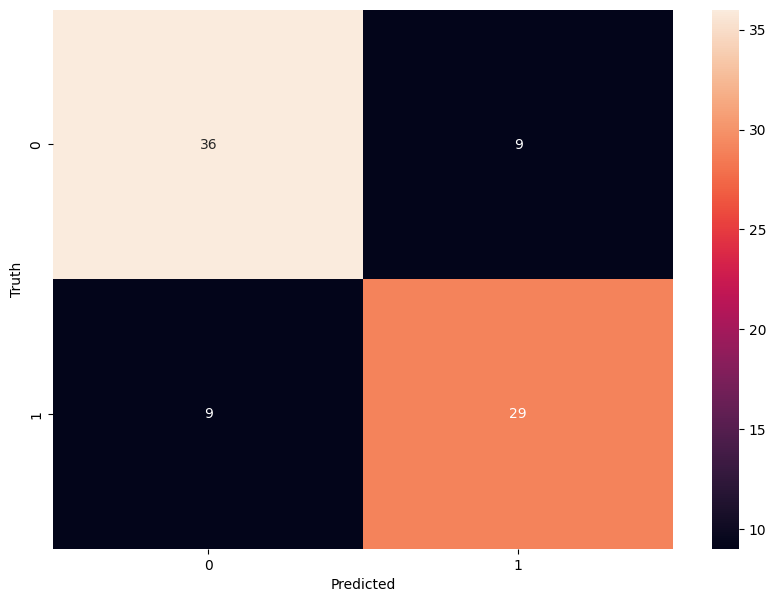

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,nb_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**KNN**

In [ ]:
import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.05413675308227539s


In [ ]:
a=time.time()
knn_pred=model.predict(X_test)
b=time.time()
print(b-a)

0.005362033843994141


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.76      0.76      0.76        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83



In [ ]:
from sklearn.metrics import accuracy_score
ka=accuracy_score(y_test,knn_pred)
ka

0.7831325301204819

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,knn_pred,squared=False)

0.46569031542379974

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,knn_pred)

0.21686746987951808

In [ ]:
ktr=logr.score(X_train,y_train)
kte=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

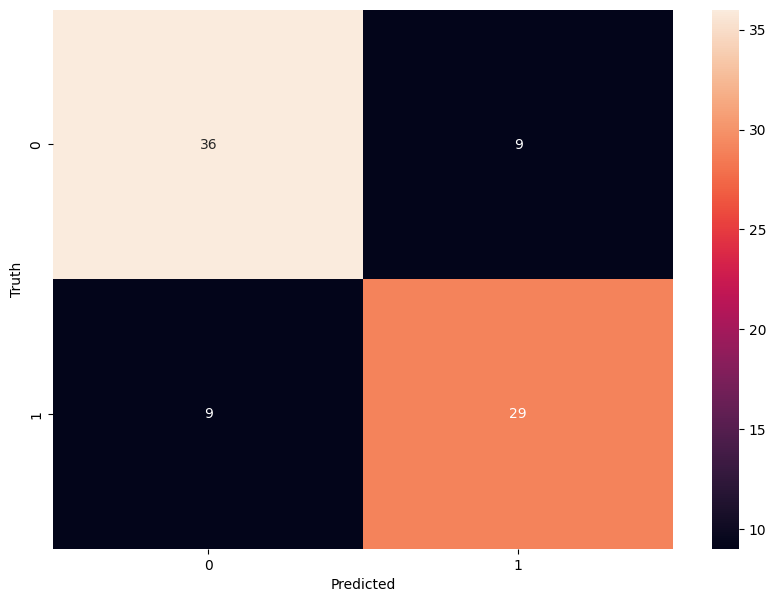

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**SVM**

In [ ]:
import time
start = time.time()
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.01978921890258789s


In [ ]:
a=time.time()
svm_pred=model.predict(X_test)
b=time.time()
print(b-a)

0.009047746658325195


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        45
           1       0.63      0.58      0.60        38

    accuracy                           0.65        83
   macro avg       0.65      0.65      0.65        83
weighted avg       0.65      0.65      0.65        83



In [ ]:
from sklearn.metrics import accuracy_score
sa=accuracy_score(y_test,svm_pred)
sa

0.6506024096385542

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,svm_pred,squared=False)

0.5910986299776424

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,svm_pred)

0.3493975903614458

In [ ]:
svtr=logr.score(X_train,y_train)
ste=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

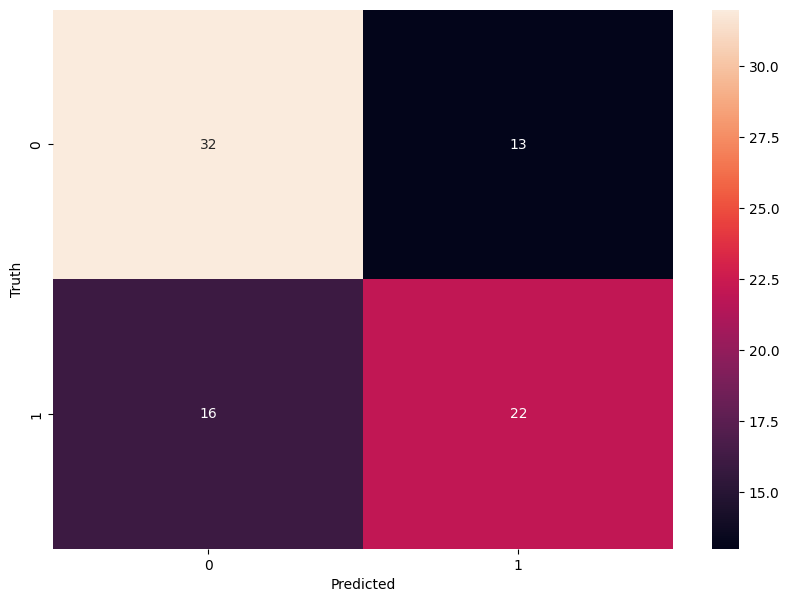

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,svm_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Decision Tree**

In [ ]:
import time
start = time.time()
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree = dtree.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.042688608169555664s


In [ ]:
a=time.time()
tree_pred=model.predict(X_test)
b=time.time()
print(b-a)

0.008645296096801758


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        45
           1       0.63      0.58      0.60        38

    accuracy                           0.65        83
   macro avg       0.65      0.65      0.65        83
weighted avg       0.65      0.65      0.65        83



In [ ]:
from sklearn.metrics import accuracy_score
da=accuracy_score(y_test,tree_pred)
da

0.6506024096385542

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,tree_pred,squared=False)

0.5910986299776424

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tree_pred)

0.3493975903614458

In [ ]:
dtr=logr.score(X_train,y_train)
dte=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

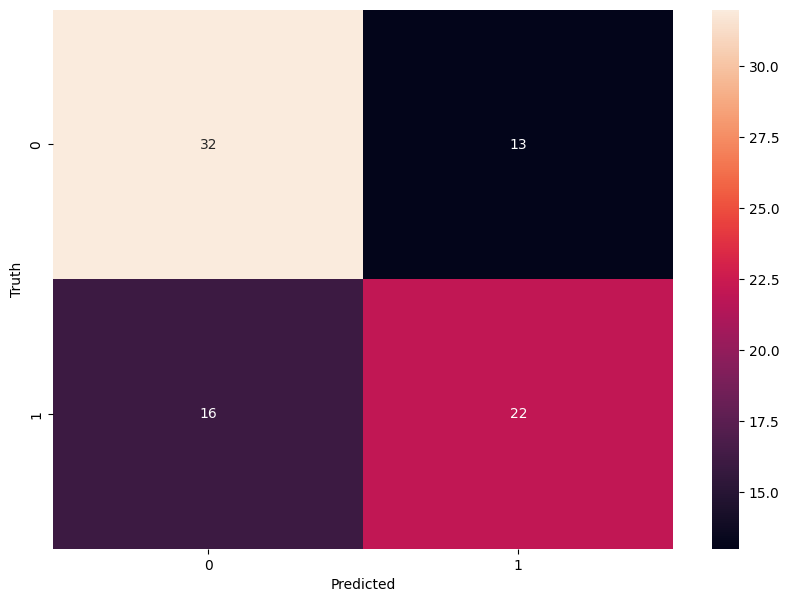

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,tree_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Random Forest**

In [ ]:
import time
start = time.time()
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.11346721649169922s


In [ ]:
a=time.time()
forest_pred=model.predict(X_test)
b=time.time()
print(b-a)

0.009468317031860352


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        45
           1       0.71      0.58      0.64        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.69        83



In [ ]:
from sklearn.metrics import accuracy_score
ra=accuracy_score(y_test,forest_pred)
ra

0.6987951807228916

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,forest_pred,squared=False)

0.5488212999484517

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,forest_pred)

0.30120481927710846

In [ ]:
rtr=logr.score(X_train,y_train)
rte=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

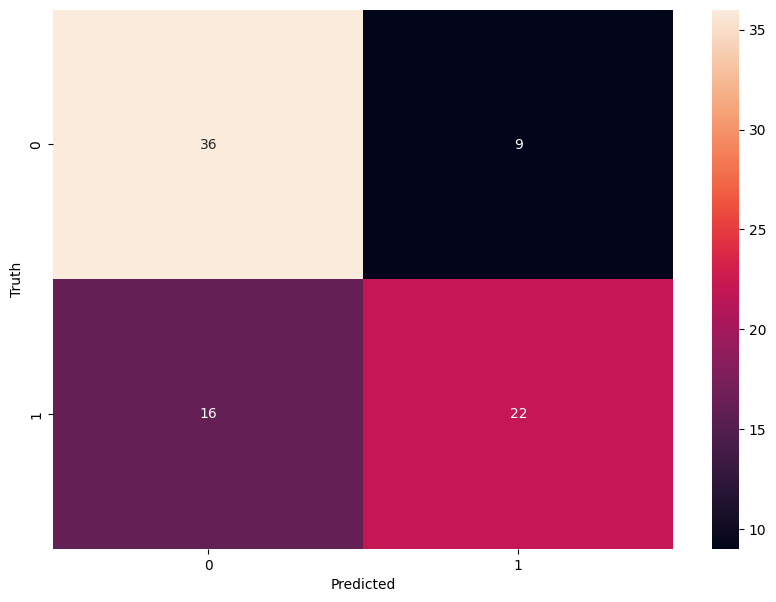

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,forest_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Gradient Boost**

In [ ]:
import time
start = time.time()
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.07459473609924316s


In [ ]:
gb_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        45
           1       0.71      0.58      0.64        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.69        83



In [ ]:
from sklearn.metrics import accuracy_score
ga=accuracy_score(y_test,gb_pred)
ga

0.6987951807228916

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,gb_pred,squared=False)

0.5488212999484517

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,gb_pred)

0.30120481927710846

In [ ]:
gtr=logr.score(X_train,y_train)
gte=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

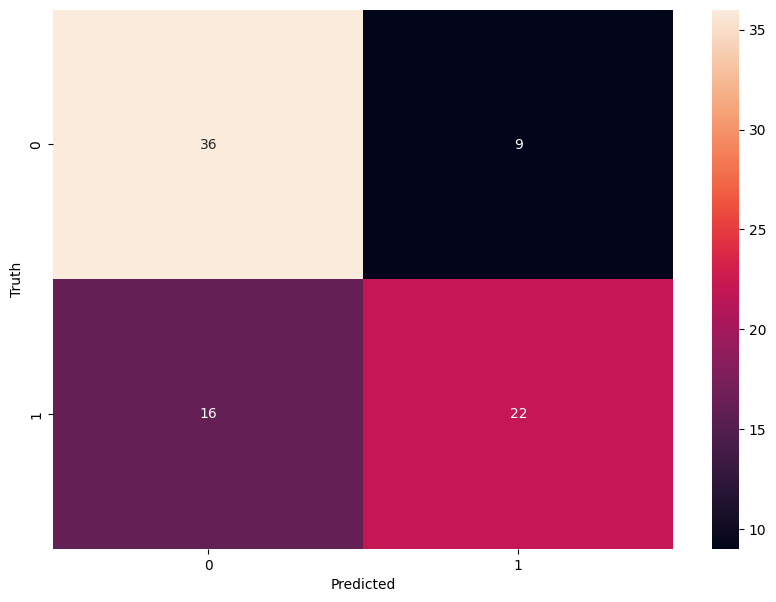

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,gb_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Adaboost**

In [ ]:
import time
start = time.time()
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.16885876655578613s


In [ ]:
ab_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        45
           1       0.71      0.58      0.64        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.69        83



In [ ]:
from sklearn.metrics import accuracy_score
aa=accuracy_score(y_test,ab_pred)
aa

0.6987951807228916

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ab_pred,squared=False)

0.5488212999484517

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ab_pred)

0.30120481927710846

In [ ]:
atr=logr.score(X_train,y_train)
ate=logr.score(X_test,y_test)

Text(95.72222222222221, 0.5, 'Truth')

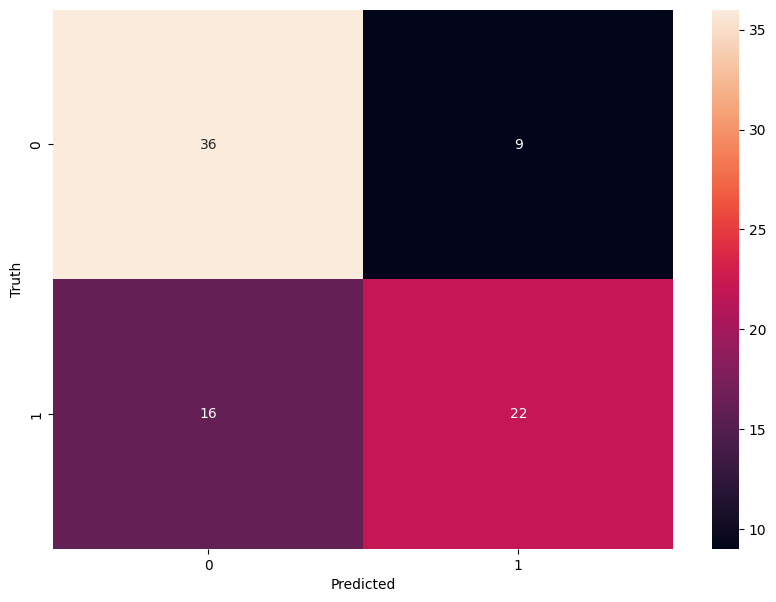

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ab_pred)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**ANN**

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 16ms/step - loss: 6.2930 - accuracy: 0.5520 - val_loss: 5.1830 - val_accuracy: 0.5727
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 5.5247 - accuracy: 0.5520 - val_loss: 4.6758 - val_accuracy: 0.5727
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 5.2711 - accuracy: 0.5520 - val_loss: 4.4928 - val_accuracy: 0.5727
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 4.8826 - accuracy: 0.5520 - val_loss: 4.4451 - val_accuracy: 0.5727
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 4.6679 - accuracy: 0.5520 - val_loss: 4.2199 - val_accuracy: 0.5727
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 4.2580 - accuracy: 0.5520 - val_loss: 3.9409 - val_accuracy: 0.5727
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 3.7396 - accuracy: 0.5520 - val_loss: 3.1578 - val_accuracy: 0.5727
Epoch 8/50
23/23 [=

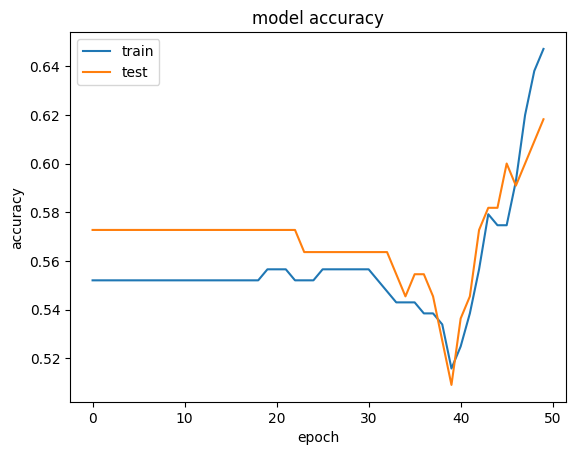

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

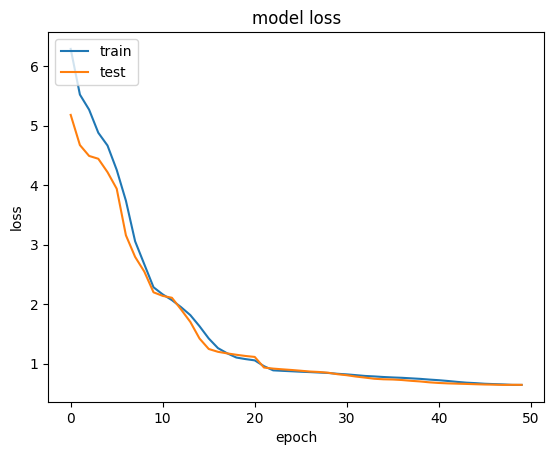

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       False       0.73      0.57      0.64        58
        True       0.34      0.52      0.41        25

    accuracy                           0.55        83
   macro avg       0.54      0.54      0.53        83
weighted avg       0.62      0.55      0.57        83



**GRAPHS**

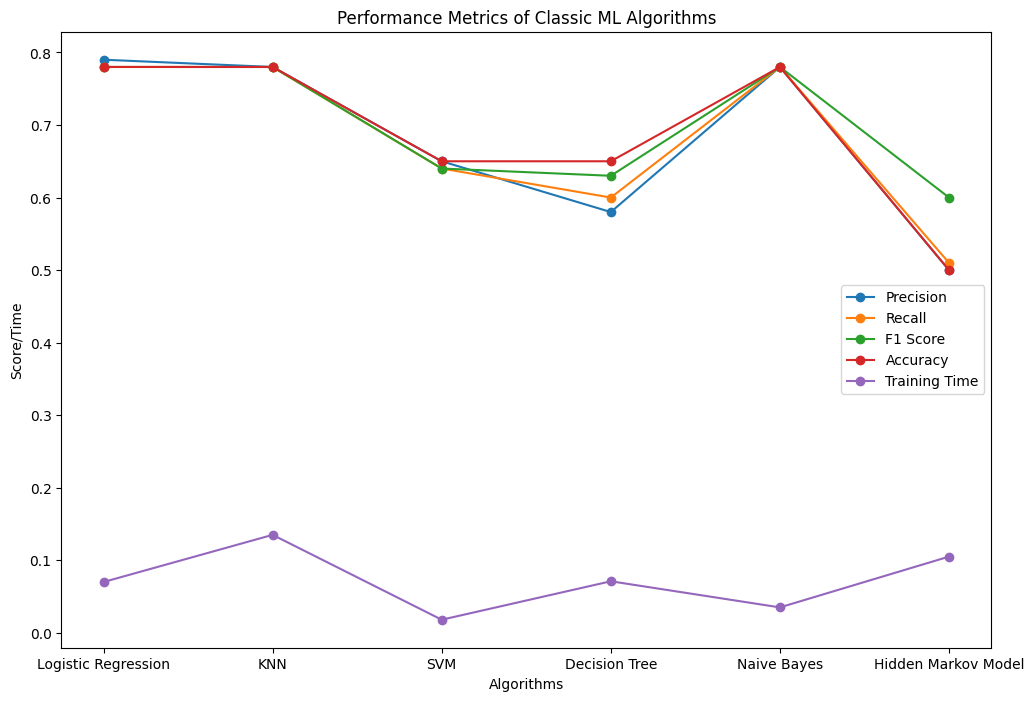

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
classical_ml_algorithms = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'Hidden Markov Model']
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Training Time']

# Metric values
precision = [0.79, 0.78, 0.65, 0.58, 0.78, 0.50]
recall = [0.78, 0.78, 0.64, 0.60, 0.78, 0.51]
f1_score = [0.78, 0.78, 0.64, 0.63, 0.78, 0.60]
accuracy = [0.78, 0.78, 0.65, 0.65, 0.78, 0.50]
training_time = [0.070, 0.135, 0.018, 0.071, 0.035, 0.105]

# Create line plots
plt.figure(figsize=(12, 8))
x = np.arange(len(classical_ml_algorithms))

plt.plot(x, precision, marker='o', label='Precision')
plt.plot(x, recall, marker='o', label='Recall')
plt.plot(x, f1_score, marker='o', label='F1 Score')
plt.plot(x, accuracy, marker='o', label='Accuracy')
plt.plot(x, training_time, marker='o', label='Training Time')

# Set plot title, x-axis label, and y-axis label
plt.title('Performance Metrics of Classic ML Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score/Time')

# Set x-axis tick labels
plt.xticks(x, classical_ml_algorithms)

# Add a legend
plt.legend()

# Display the plot
plt.show()


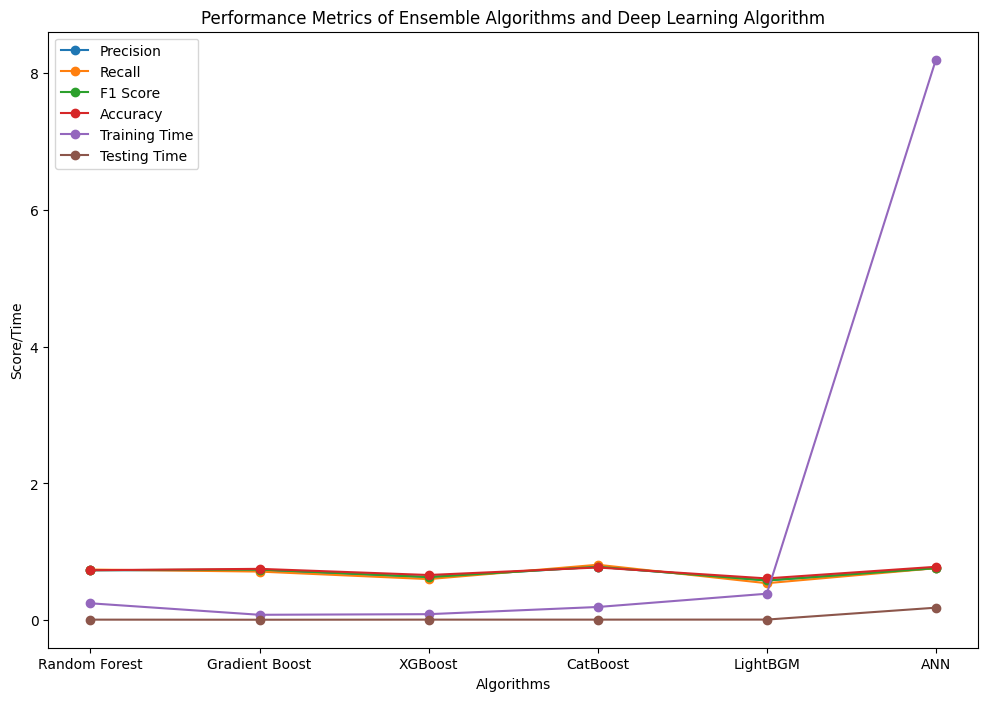

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
ensemble_algorithms = ['Random Forest', 'Gradient Boost', 'XGBoost', 'CatBoost', 'LightBGM', 'ANN']
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Training Time', 'Testing Time']

# Metric values
precision = [0.73, 0.73, 0.63, 0.78, 0.58, 0.76]
recall = [0.74, 0.71, 0.60, 0.81, 0.54, 0.76]
f1_score = [0.73, 0.74, 0.63, 0.78, 0.58, 0.76]
accuracy = [0.73, 0.75, 0.66, 0.77, 0.61, 0.78]
training_time = [0.246, 0.078, 0.087, 0.192, 0.386, 8.198]
testing_time = [0.0070, 0.0058, 0.0071, 0.0072, 0.0078, 0.182]

# Create line plots
plt.figure(figsize=(12, 8))
x = np.arange(len(ensemble_algorithms))

plt.plot(x, precision, marker='o', label='Precision')
plt.plot(x, recall, marker='o', label='Recall')
plt.plot(x, f1_score, marker='o', label='F1 Score')
plt.plot(x, accuracy, marker='o', label='Accuracy')
plt.plot(x, training_time, marker='o', label='Training Time')
plt.plot(x, testing_time, marker='o', label='Testing Time')

# Set plot title, x-axis label, and y-axis label
plt.title('Performance Metrics of Ensemble Algorithms and Deep Learning Algorithm')
plt.xlabel('Algorithms')
plt.ylabel('Score/Time')

# Set x-axis tick labels
plt.xticks(x, ensemble_algorithms)

# Add a legend
plt.legend()

# Display the plot
plt.show()


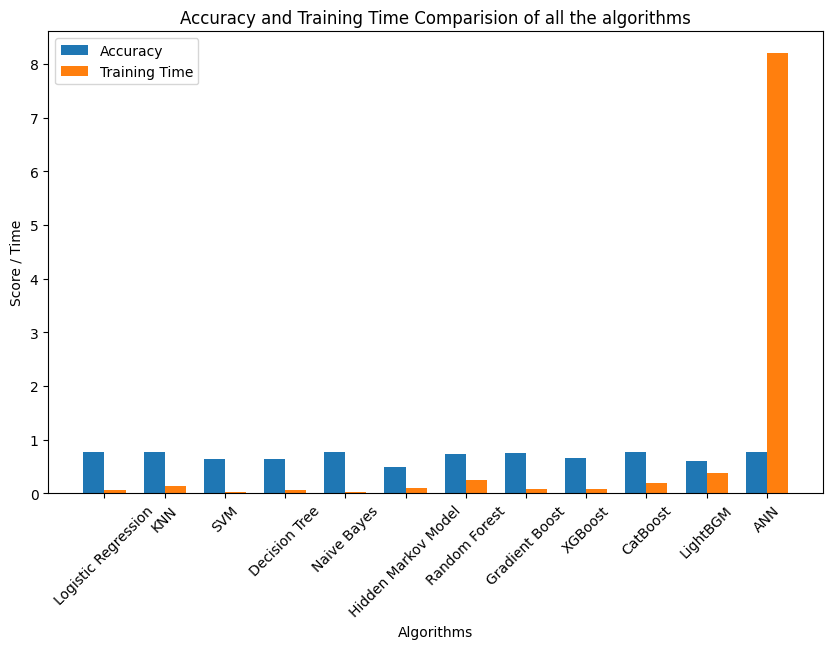

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'Hidden Markov Model','Random Forest', 'Gradient Boost', 'XGBoost', 'CatBoost', 'LightBGM', 'ANN']

# Accuracy and training time values
accuracy = [0.78, 0.78, 0.65, 0.65, 0.78, 0.50,0.73, 0.75, 0.66, 0.77, 0.61, 0.78]
training_time = [0.070, 0.135, 0.018, 0.071, 0.035, 0.105,0.246, 0.078, 0.087, 0.192, 0.386, 8.198]

# Set the width of the bars
bar_width = 0.35

# Create a numpy array for the x-axis positions
x = np.arange(len(algorithms))

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
accuracy_bars = ax.bar(x, accuracy, bar_width, label='Accuracy')
time_bars = ax.bar(x + bar_width, training_time, bar_width, label='Training Time')

# Set the labels, title, and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Score / Time')
ax.set_title('Accuracy and Training Time Comparision of all the algorithms')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()

# Display the plot
plt.show()
